In [1]:
using CairoMakie, CSV, DataFrames, Pipe, StatsKit

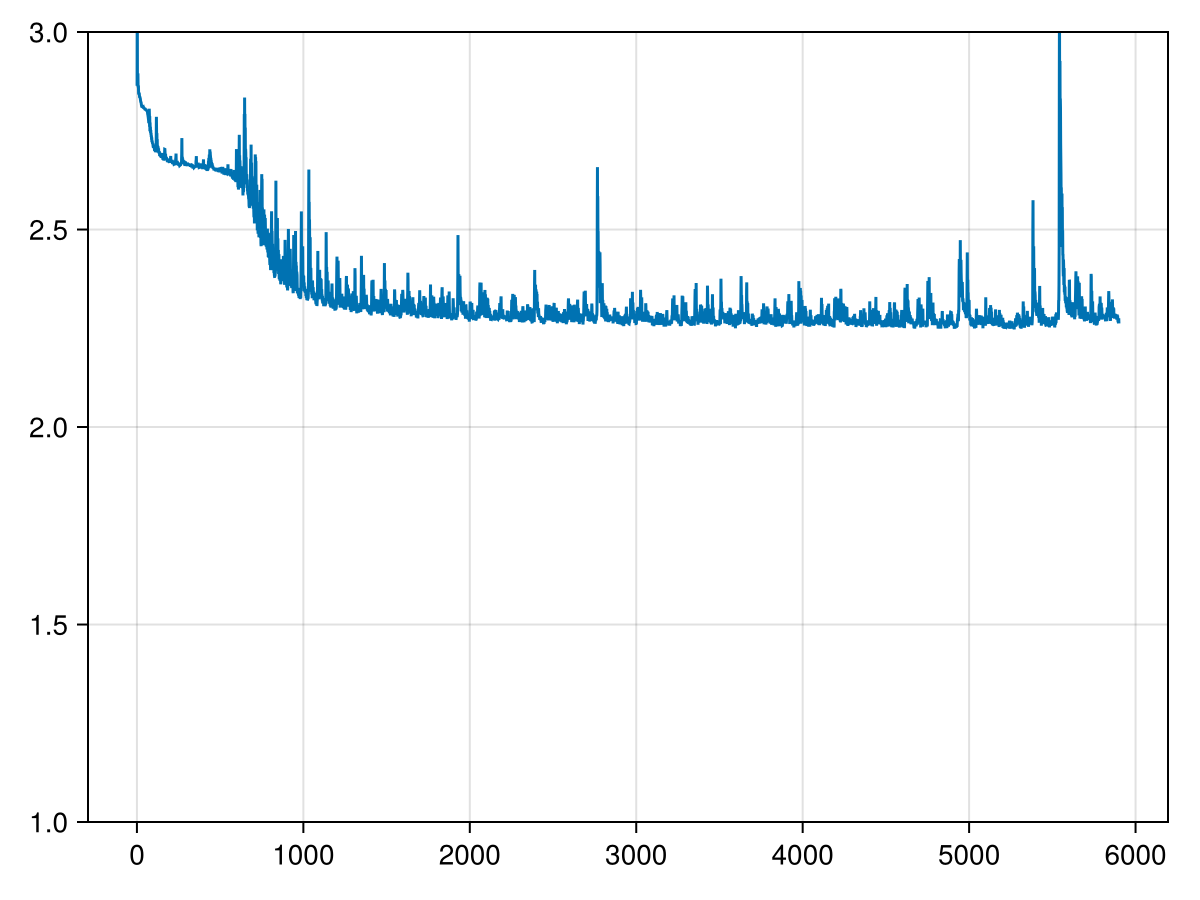

In [24]:
all_csv = [i for i in readdir() if occursin(".csv", i)]
all_df = [CSV.read(j, DataFrame, header=true) for j in all_csv]
long_df = outerjoin(all_df..., on=intersect([names(j) for j in all_df]...))
@pipe long_df |> select(_,[:itr,:loss]) |> sort(_,:itr) |> lines(eachcol(_)...)
ax = current_axis()
# xlims!(ax, 000,12000)
ylims!(ax, 1,3)
current_figure()

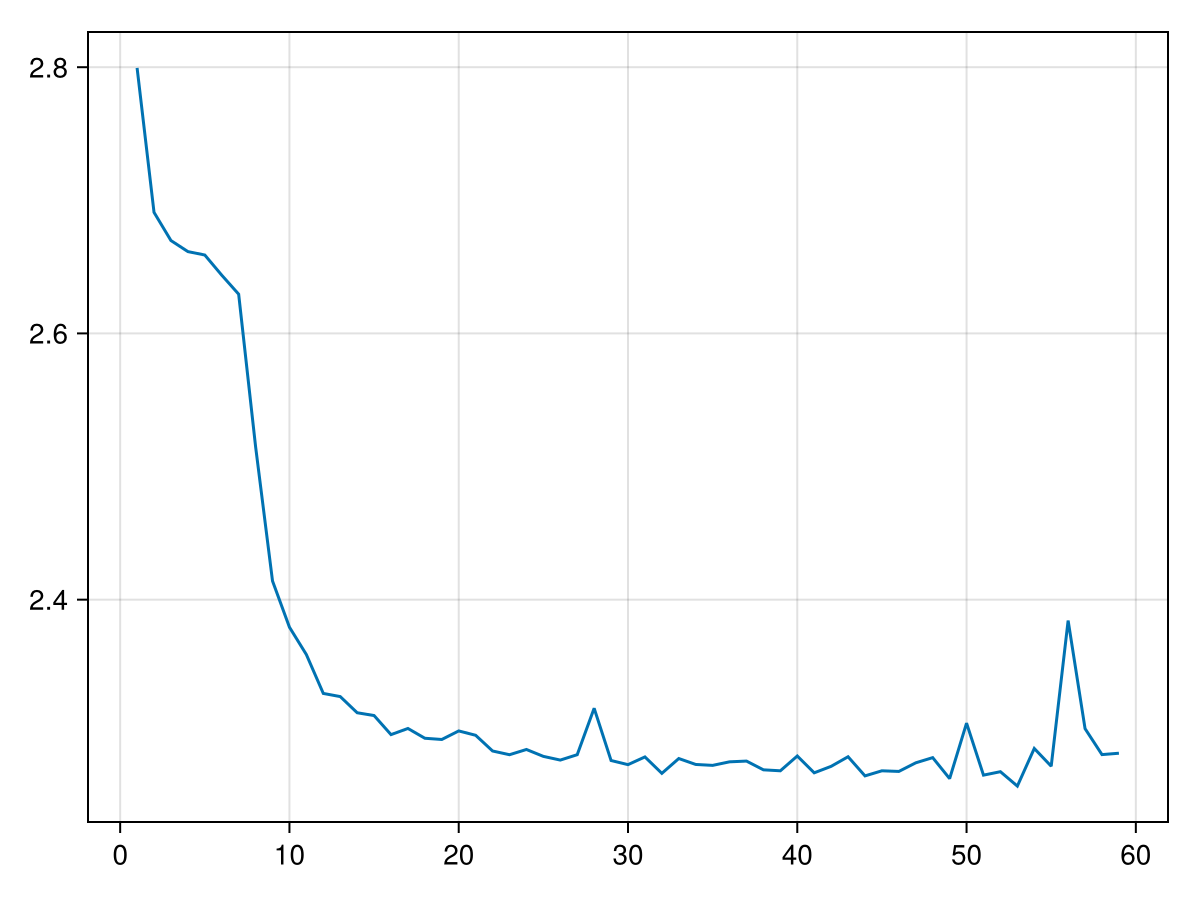

In [25]:
@pipe ceil.(long_df[:,:itr] / 100) |> 
    trunc.(Int64,_) |> 
    DataFrame(itr=long_df[:,:itr],index = _) |> 
    innerjoin(_, long_df, on=:itr) |> groupby(_,:index)  |> 
    combine(_, :loss => mean) |> lines(eachcol(_)...)


In [21]:
@pipe long_df |> filter(:itr => x -> x%100==1, _) |> sort(_, :loss)

Row,Column1,itr,loss
,Int64,Float64,Float64
1,0,3201.0,2.25654
2,0,5201.0,2.25895
3,0,3601.0,2.25921
4,0,4401.0,2.26042
5,0,3901.0,2.26145
6,0,4801.0,2.26186
7,0,3001.0,2.26276
8,0,3501.0,2.26448
9,0,3101.0,2.26479


In [78]:
print(size(long_df))

(3100, 3)

In [23]:
@pipe long_df |> sort(_, :loss) |> first(_,10)

Row,Column1,itr,loss
,Int64,Float64,Float64
1,70,5271.0,2.24706
2,14,5215.0,2.24837
3,43,5244.0,2.24857
4,10,4911.0,2.24872
5,29,4830.0,2.24882
6,8,5209.0,2.24886
7,13,4814.0,2.24901
8,11,5312.0,2.24907
9,72,4673.0,2.24908
